# Palmer Penguins - Data Exploration 🗺🧭🐧

Los Palmer Penguins son un conjunto de datos introducido como una alternativa al muy usado conjunto de datos de Iris para tareas de clasificación y visualización en ciencia de datos. Este conjunto incluye medidas de tres especies diferentes de pingüinos encontrados en las islas Palmer, cerca de la Antártida. Las especies son: Adelie, Chinstrap, y Gentoo. Las medidas recogidas incluyen el tamaño de la aleta (flipper), la longitud del pico, la profundidad del pico, y la masa corporal de los pingüinos, además del sexo y la isla en la que fue encontrado cada ejemplar. Este conjunto de datos es particularmente útil para enseñar análisis de datos y técnicas de machine learning debido a su tamaño manejable, su estructura limpia, y porque permite la exploración de conceptos como la clasificación, la regresión y la agrupación.

![Palmer Penguins](https://media.istockphoto.com/id/163344719/photo/antarctica-king-penguin-head.jpg?s=612x612&w=0&k=20&c=VuB9z3mmq031UONGxjc5tKgRd0N3dKHJymKatIImFZo=)

## Importacion de librerias

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

### Establecer apariencia general de los gráficos

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Cargar los datos

## Utilizando el paquete palmerpenguins

Datos crudos

In [3]:
raw_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv')
raw_penguins_df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


Datos previamente procesados

In [2]:
preproccessed_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
preproccessed_penguins_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


# Análisis exploratorio de datos

## Validación de datos

### ¿Qué estructura general tiene la base de datos?

In [5]:
(
    preproccessed_penguins_df
.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### ¿Qué tipo de dato son las variables del conjunto de datos?

In [6]:
preproccessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [7]:
(
    preproccessed_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [8]:
preproccessed_penguins_df.shape

(344, 8)

### Existen valores nulos explicitos en el conjunto de datos?

In [9]:
(
    preproccessed_penguins_df
    .isna()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [10]:
(
    preproccessed_penguins_df
    .isna()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [11]:
(
    preproccessed_penguins_df
    .isna()
    .sum()
    .sum()
)

19

### ¿Cuál es la proporción de valores nulos por cada variable?

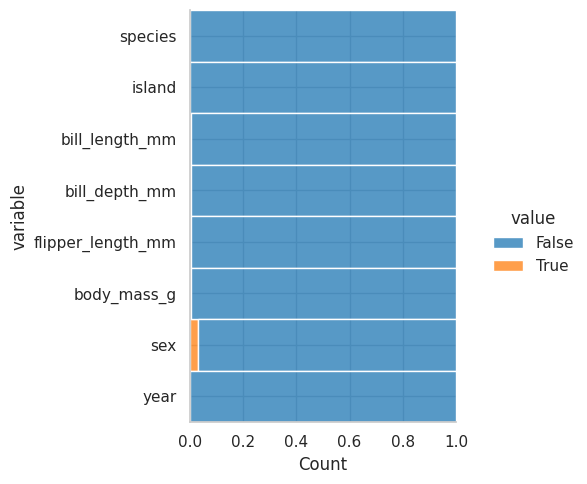

In [12]:
(
    preproccessed_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:  (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
            )
        )
    )
)

### ¿Cómo podemos visualizar Ios valores nulos en todo el conjunto de datos?

In [13]:
(
    preproccessed_penguins_df
    .isna()
    .transpose()
)

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

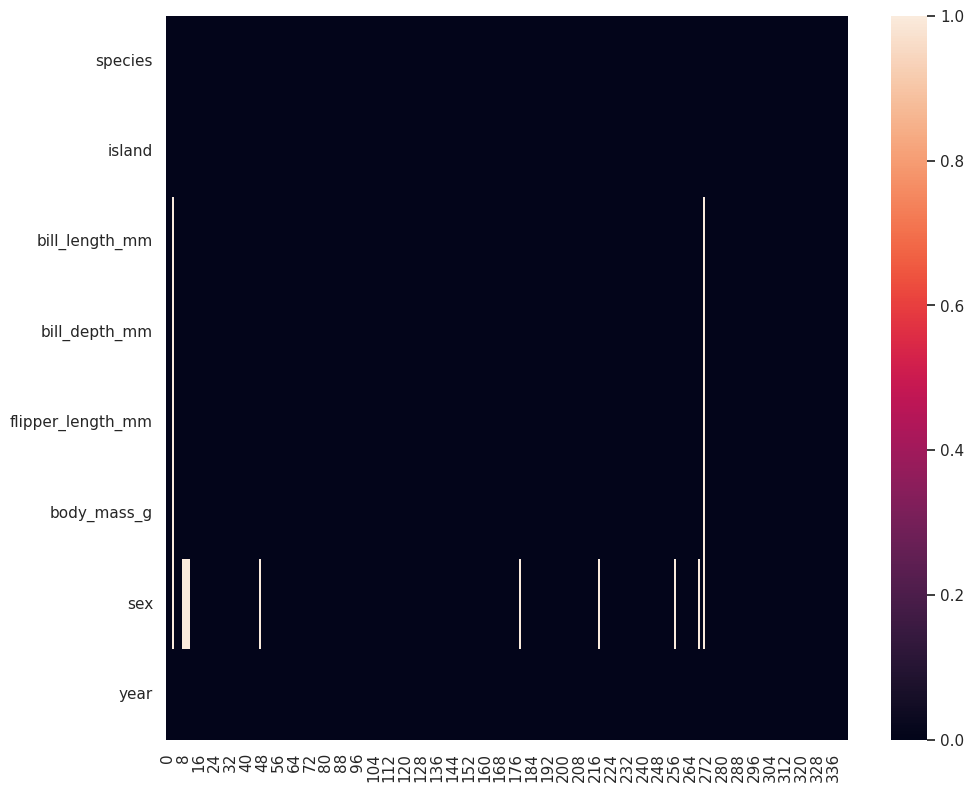

In [14]:
(
    preproccessed_penguins_df
    .isna()
    .transpose()
    .pipe(
        lambda df:  (
            sns.heatmap(
                data=df
            )
        )
    )
)

### ¿Cuántas observaciones perdemos si eliminamos Ios datos faltantes?

In [3]:
penguins_df =(
    preproccessed_penguins_df
    .dropna()
)

In [16]:
len(preproccessed_penguins_df) - len(penguins_df)

11

# Conteos y proporciones
## ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [17]:
penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numericas

In [18]:
penguins_df.describe(include=np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [19]:
penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [20]:
(
    penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    }
    )
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [21]:
penguins_df=(
    penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
)

In [22]:
penguins_df.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### ¿Cómo puedo visualizar los conteos?

In [23]:
(
    penguins_df
    .species
    .value_counts()
)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

### ¿Cuántos datos tengo de cada especie de pinguino?

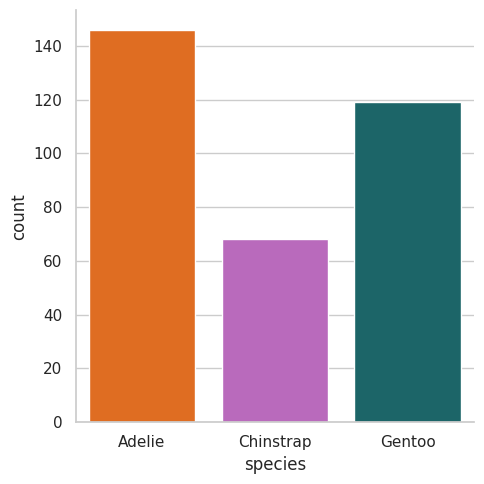

In [24]:
sns.catplot(
    data=penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
);

In [25]:
(
    penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
)

,species,count
0,Adelie,146
1,Gentoo,119
2,Chinstrap,68


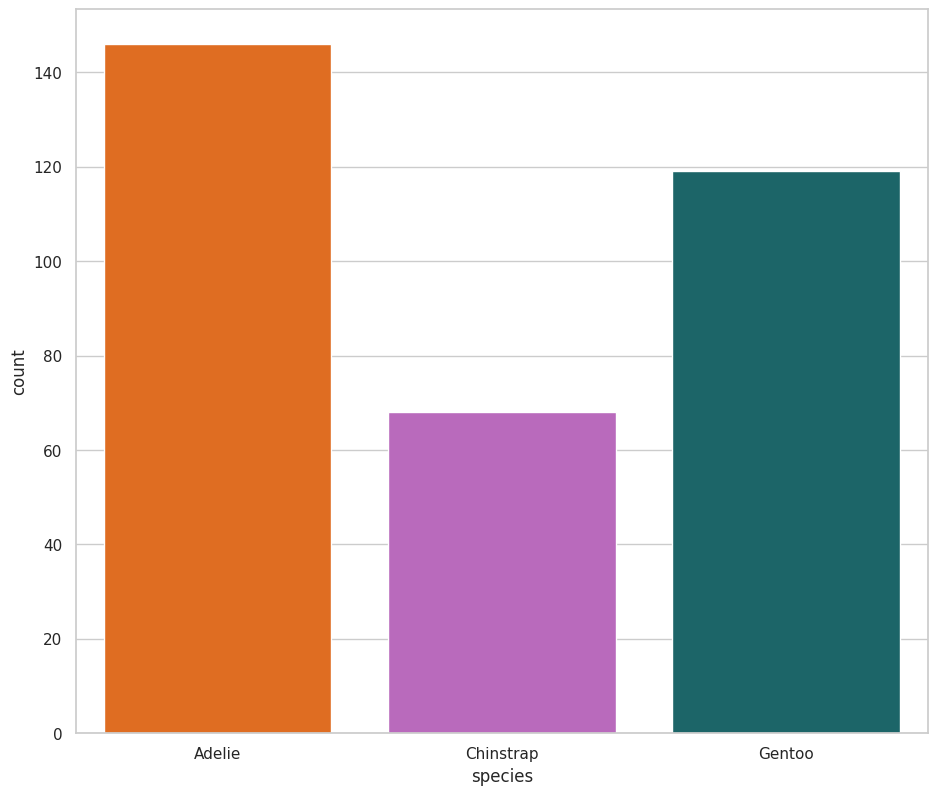

In [26]:
# Otra forma de hacerlo

(
    penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:  (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
);

### ¿Cómo visualizar las proporciones?

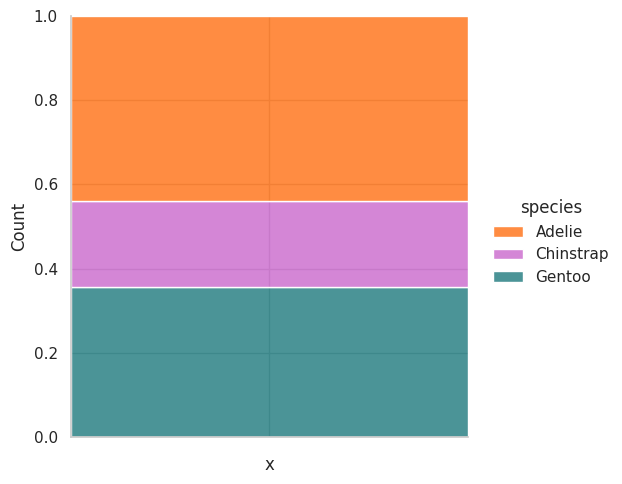

In [27]:
(
    penguins_df
    .add_column('x','')
    .pipe(
        lambda df:  (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color,

            )
        )
    )
);

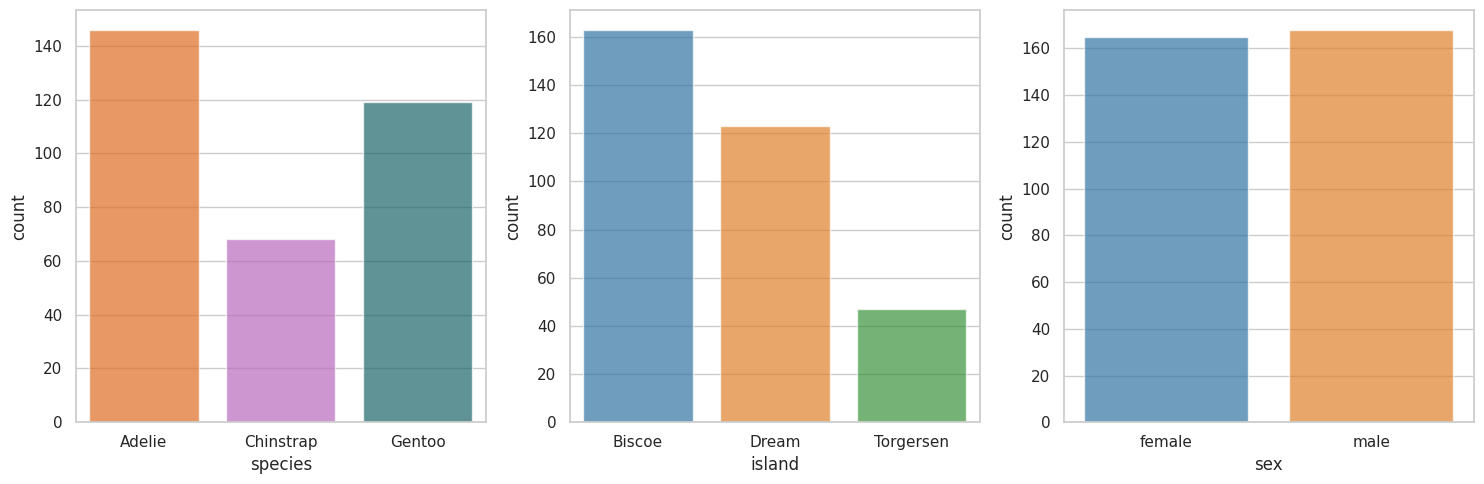

In [28]:
import matplotlib.pyplot as plt

category_cols = penguins_df.select_dtypes('category').columns

fig, ax = plt.subplots(1, len(category_cols), figsize=(15, 5))
for i, col in enumerate(category_cols):
    # Usamos sns.countplot para simplificar el conteo y la graficación
    if i == 0:
        sns.countplot(data=penguins_df, x=col, ax=ax[i], alpha=0.7, palette=penguin_color)
    else:
        sns.countplot(data=penguins_df, x=col, ax=ax[i], alpha=0.7)

plt.tight_layout()
plt.show()


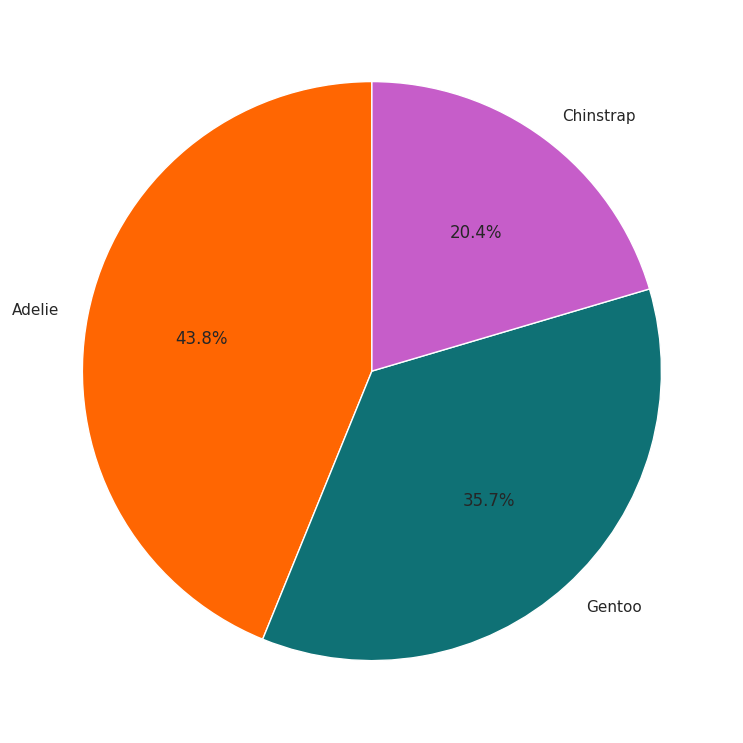

In [29]:
(
    penguins_df
    .value_counts('species')
    .pipe(
        lambda sp: (
            plt.pie(
                sp.values,
                labels=sp.index,
                colors=penguin_color.values(),
                autopct='%1.1f%%',
                startangle=90,
            )
        )
    )
);

## Medidas de tendencia central

### Media o promedio

In [30]:
penguins_df.bill_depth_mm.mean()

17.164864864864867

In [31]:
penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

### Mediana

In [32]:
penguins_df.median()

/tmp/ipykernel_15232/3721112766.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

### Moda

In [33]:
penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [34]:
penguins_df.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


# Medidas de dispersión

## Rango

### ¿Cuál es el valor máximo de las variables?

In [35]:
penguins_df.max()

/tmp/ipykernel_15232/2436754002.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.max()


bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### ¿Cuál es el valor mínimo de las variables?

In [38]:
penguins_df.min()

/tmp/ipykernel_15232/3522594670.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.min()


bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cuál es el rango de las variables?

In [40]:
penguins_df.max(numeric_only=True) - penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## Desviación estándar

### ¿Cuál es la desviación estándar de las variables?

In [41]:
penguins_df.std()

/tmp/ipykernel_15232/1381193959.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

Límites para calcular cuáles serán los límites para contener el 65% de los datos (Media +- 1 desviación estándar)

In [42]:
penguins_df.mean()+penguins_df.std()

/tmp/ipykernel_15232/2756665461.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.mean()+penguins_df.std()
/tmp/ipykernel_15232/2756665461.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.mean()+penguins_df.std()


bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

In [43]:
penguins_df.mean()-penguins_df.std()

/tmp/ipykernel_15232/2520557591.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.mean()-penguins_df.std()
/tmp/ipykernel_15232/2520557591.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.mean()-penguins_df.std()


bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

## Rango intercuartílico

### ¿Cuál es el rango intercuartílico de las variables?

In [45]:
penguins_df.quantile(0.75) - penguins_df.quantile(0.25)

/tmp/ipykernel_15232/181909976.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.quantile(0.75) - penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [55]:
(
    penguins_df
.quantile(q=[0.25,0.5,0.75])
.transpose()
.rename_axis('variable')
.reset_index()
.assign(
    IQR=lambda df: df[0.75] - df[0.25]
        )
)

/tmp/ipykernel_15232/3994171305.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df


,variable,0.25,0.5,0.75,IQR
0,bill_length_mm,39.5,44.5,48.6,9.1
1,bill_depth_mm,15.6,17.3,18.7,3.1
2,flipper_length_mm,190.0,197.0,213.0,23.0
3,body_mass_g,3550.0,4050.0,4775.0,1225.0
4,year,2007.0,2008.0,2009.0,2.0


# ¿Cómo puedo visualizar la distribución de una variable?

## Histograma

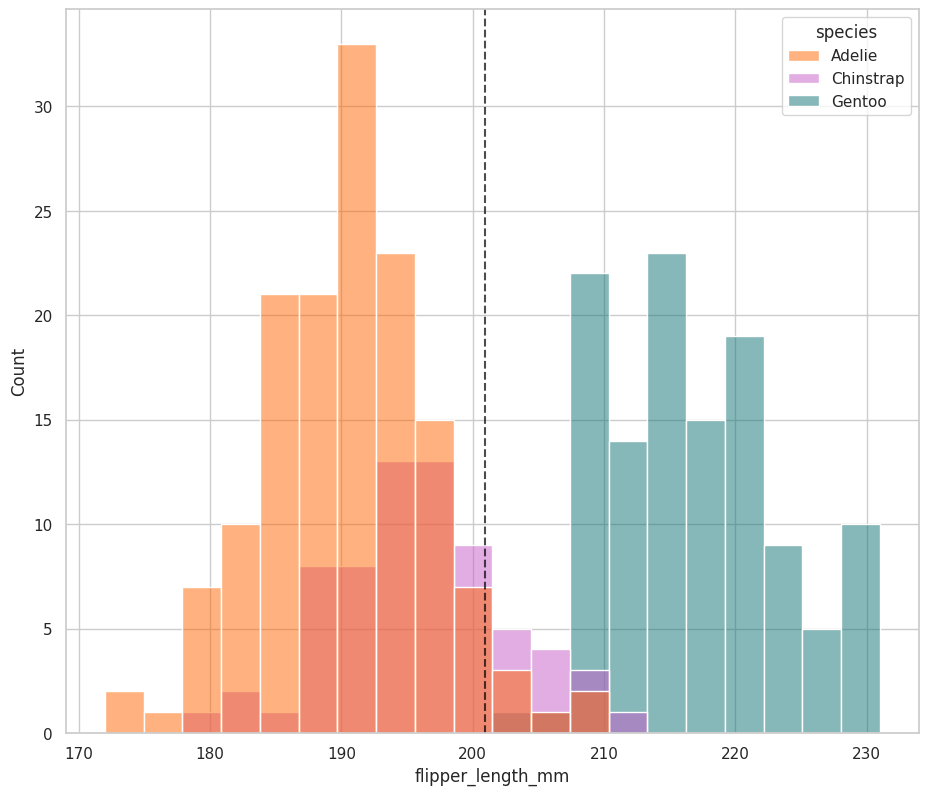

In [67]:
sns.histplot(
    data=penguins_df,
    x='flipper_length_mm', 
    bins=20, 
    hue='species',
    palette=penguin_color
    )

plt.axvline(
    x=penguins_df.flipper_length_mm.mean(),
    color='black',
    linestyle='--',
    alpha=0.7,
    label='mean'
)

### Limitaciones de histograma
Los histogramas en ocasiones no muestran patrones importantes en los datos por no ajustar adecuadamente el numero de bins.
Para eso, usamos la funcion freedman_diaconis_bindwidth() 

In [70]:
def  freedman_diaconis_bindwidth(x: pd.Series) -> float :
    """Find optimal bindwidth using Free&an-Diaconis rule."""
    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size
    
    return 2 * IQR / N ** (1 / 3)

In [75]:
freedman_diaconis_bindwidth(penguins_df.flipper_length_mm)

6.636560948202412

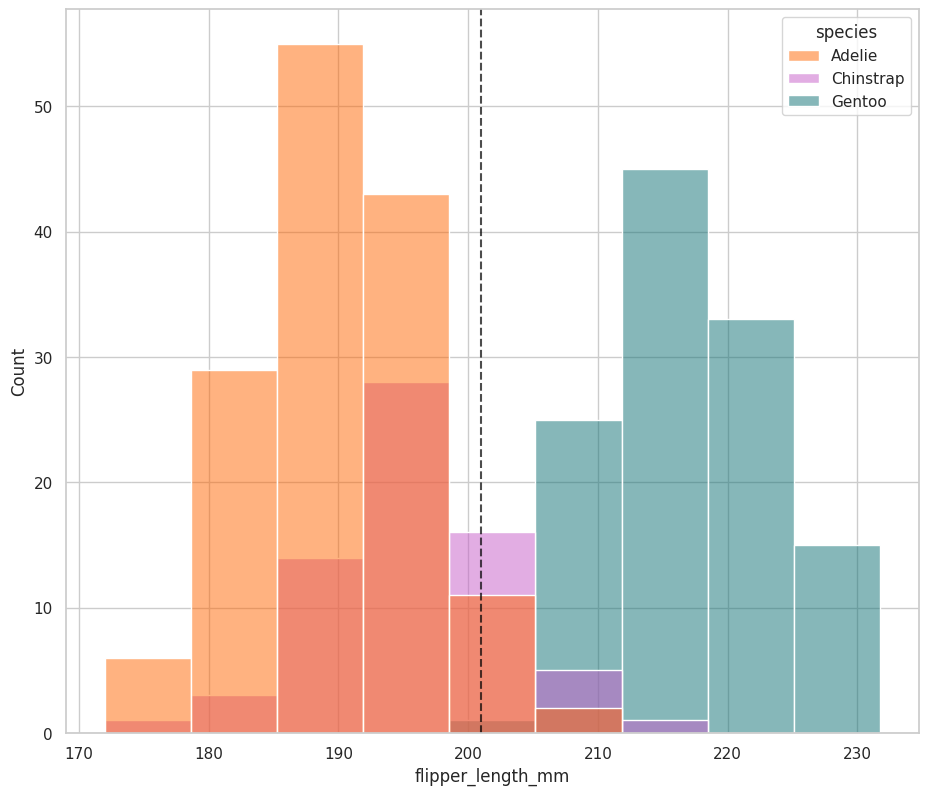

In [78]:
sns.histplot(
    data=penguins_df,
    x='flipper_length_mm', 
    binwidth=freedman_diaconis_bindwidth(penguins_df.flipper_length_mm), 
    hue='species',
    palette=penguin_color
    )

plt.axvline(
    x=penguins_df.flipper_length_mm.mean(),
    color='black',
    linestyle='--',
    alpha=0.7,
    label='mean'
)

## Boxplot

<AxesSubplot: xlabel='flipper_length_mm', ylabel='species'>

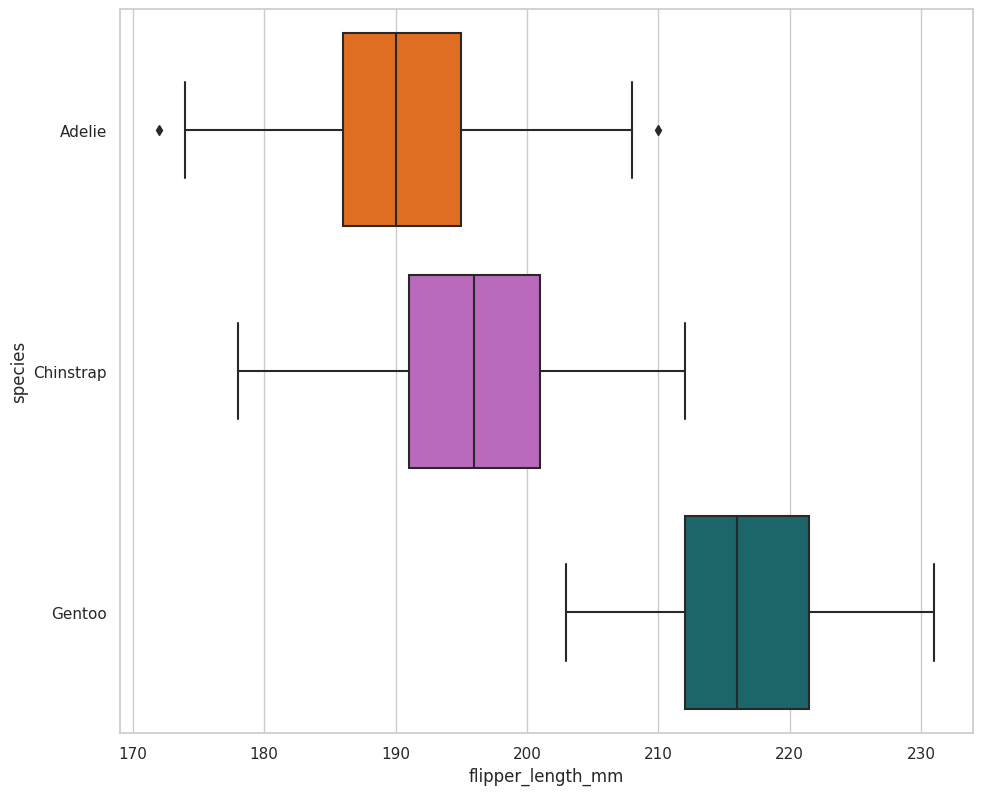

In [68]:
sns.boxplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

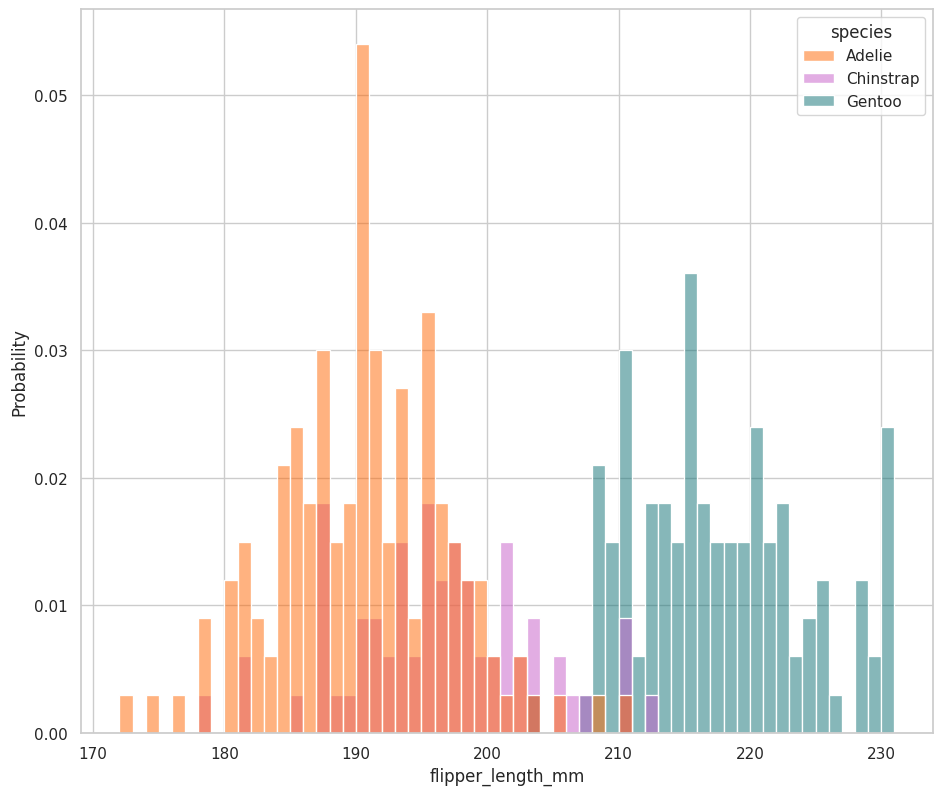

In [82]:
sns.histplot(
    data=penguins_df,
    x='flipper_length_mm', 
    binwidth=1,
    stat='probability',
    hue='species',
    palette=penguin_color
    )

### Con empiricaldist

In [88]:
pmf_flipper_length_mm=empiricaldist.Pmf.from_seq(
    penguins_df.flipper_length_mm,
    normalize=True
    )

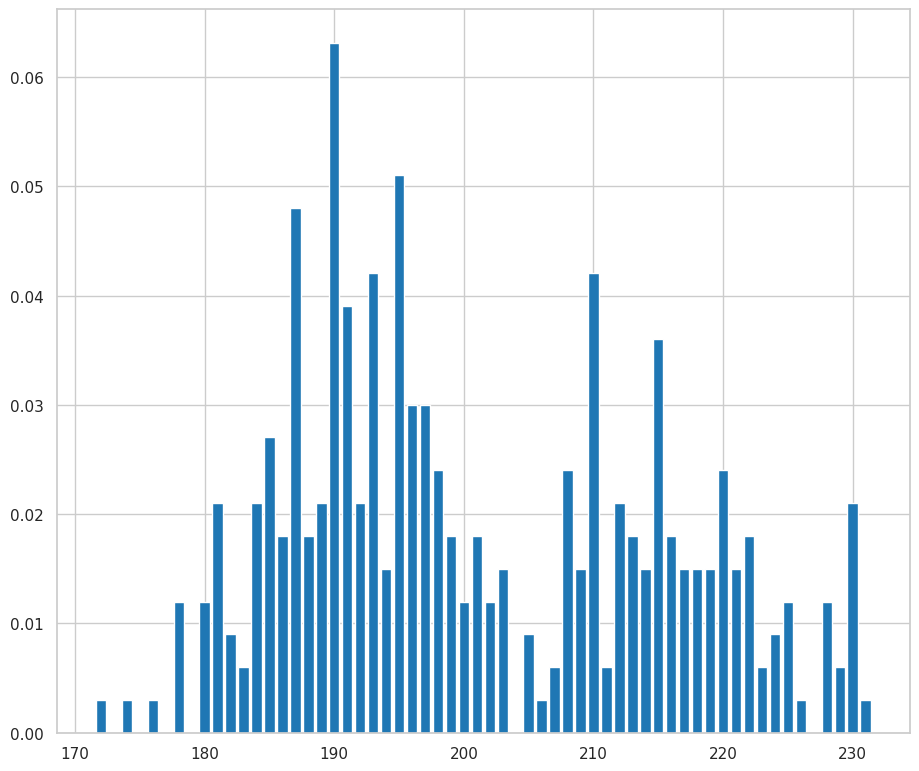

In [89]:
pmf_flipper_length_mm.bar()

In [90]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [91]:
penguins_df.flipper_length_mm.max()

231.0

## Funciones empíricas de probabilidad acumulada (ECDFs)

### Utilizando seaborn

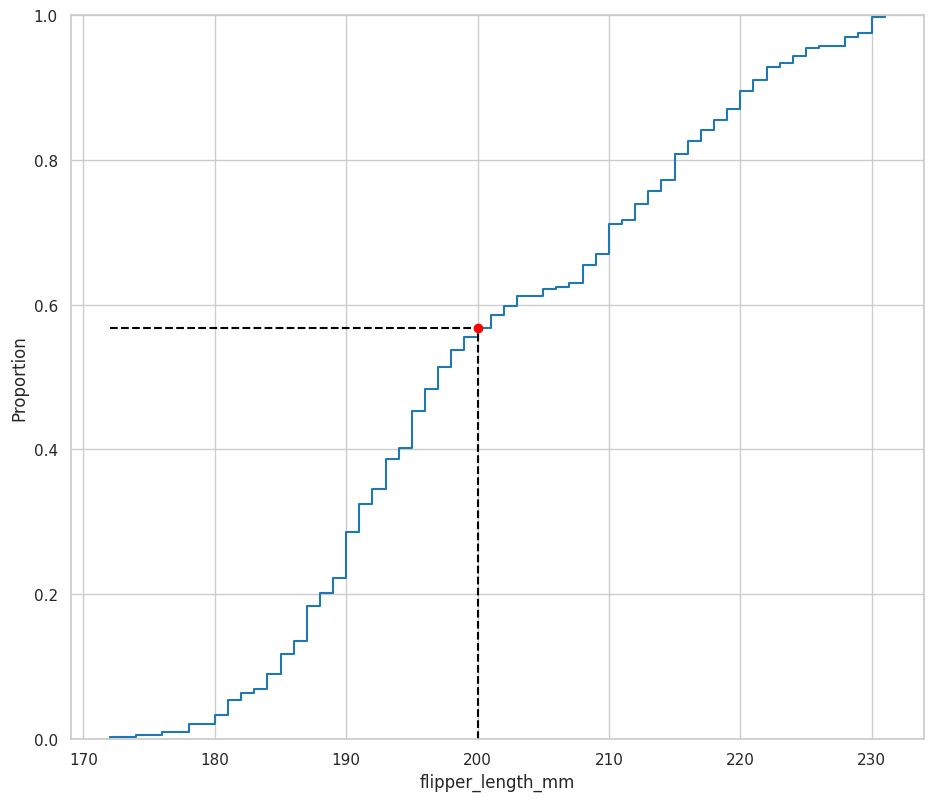

In [111]:
sns.ecdfplot(
    data=penguins_df,
    x='flipper_length_mm',
);

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle= 'dashed',
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color = 'black',
    linestyle= 'dashed',
)

plt.plot(q,p,'ro');

### Utilizando empiricaldist

In [97]:
cdf_flipper_length_mm=empiricaldist.Cdf.from_seq(
    penguins_df.flipper_length_mm,
    normalize=True
    )

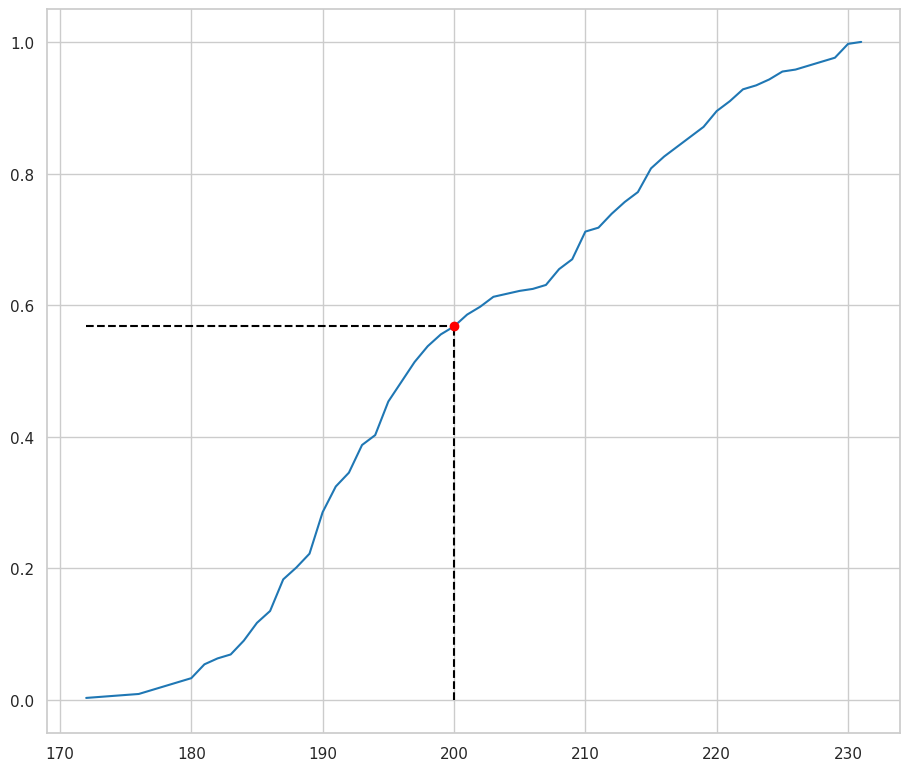

In [109]:
cdf_flipper_length_mm.plot();

q=200
p=cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle= 'dashed',
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color = 'black',
    linestyle= 'dashed',
)

plt.plot(q,p,'ro');

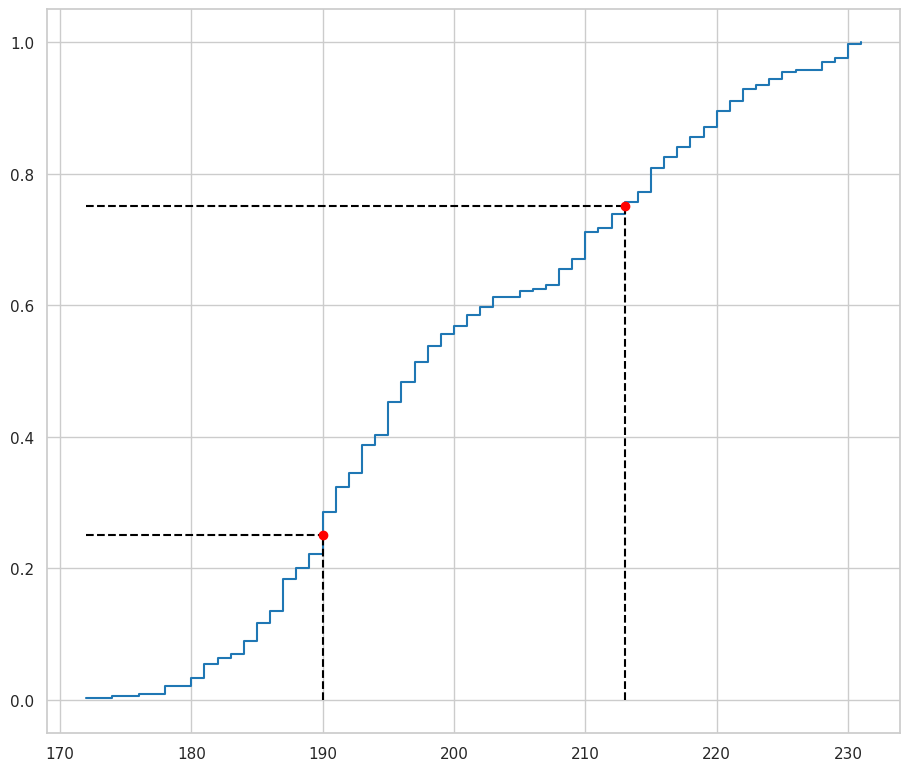

In [116]:
cdf_flipper_length_mm.step ( )
p_1 = 8.25 # Specify probability
P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
);

# Comparando distrbuciones

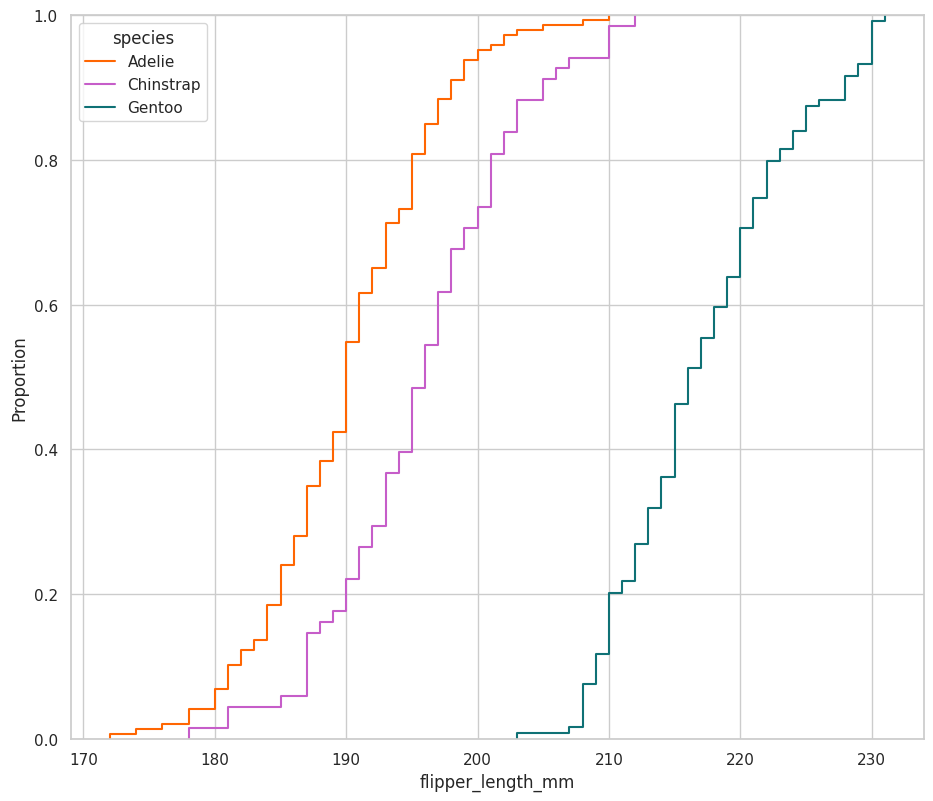

In [118]:
sns.ecdfplot(
    data=penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
);


In [120]:
## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

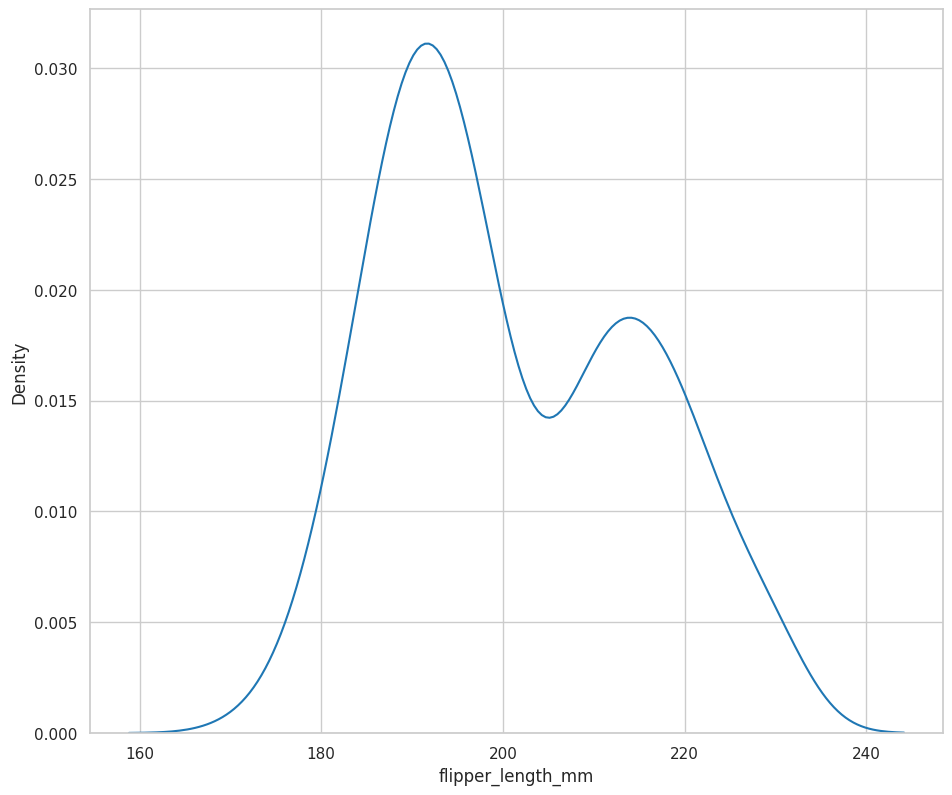

In [121]:
sns.kdeplot(
    data=penguins_df,
    x='flipper_length_mm',
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

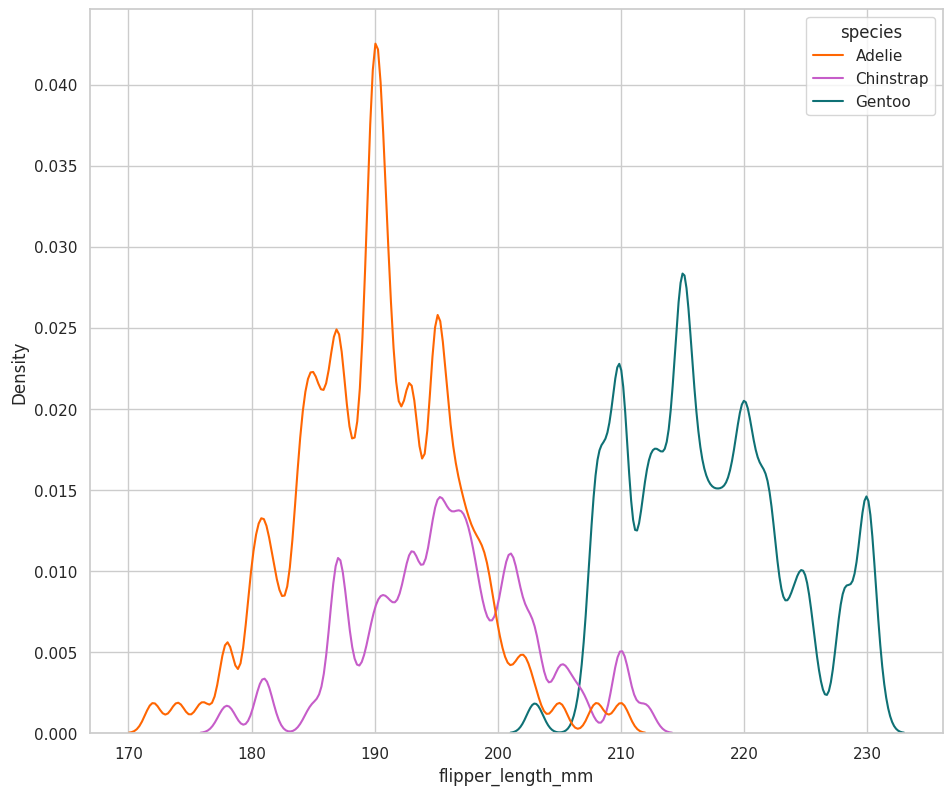

In [123]:
sns.kdeplot(
    data=penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color,
    bw_method=0.1
)

In [125]:
stats= penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

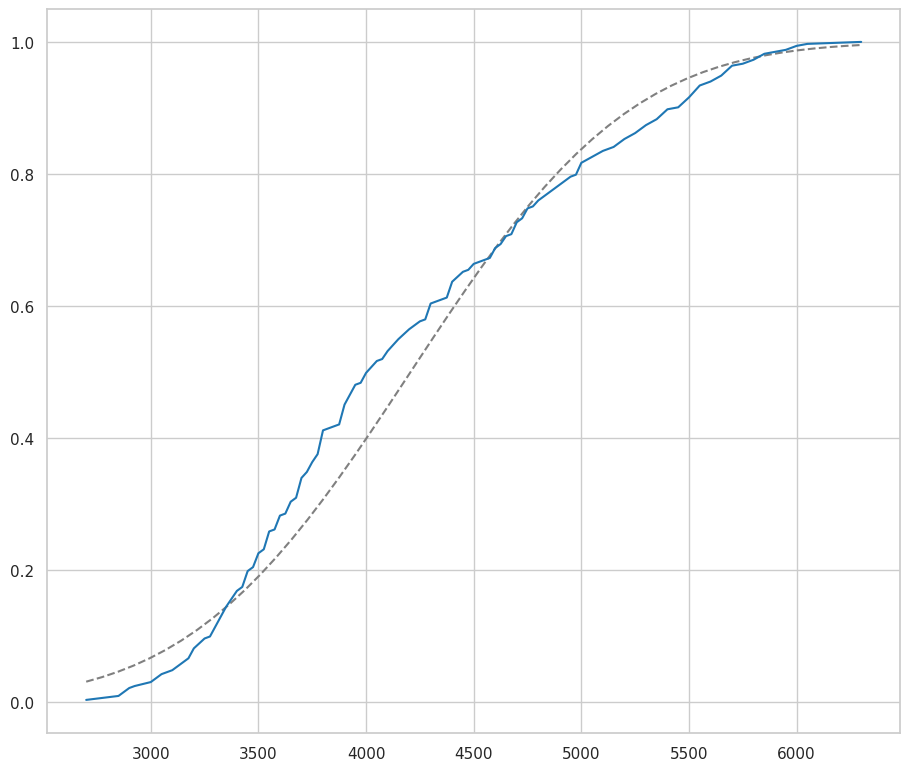

In [133]:
xs=np.linspace(stats['min'], stats['max'])
ys=scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
ys

plt.plot(xs,ys, color='gray', linestyle='dashed');

empiricaldist.Cdf.from_seq(
    penguins_df.body_mass_g,
    normalize=True
    ).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

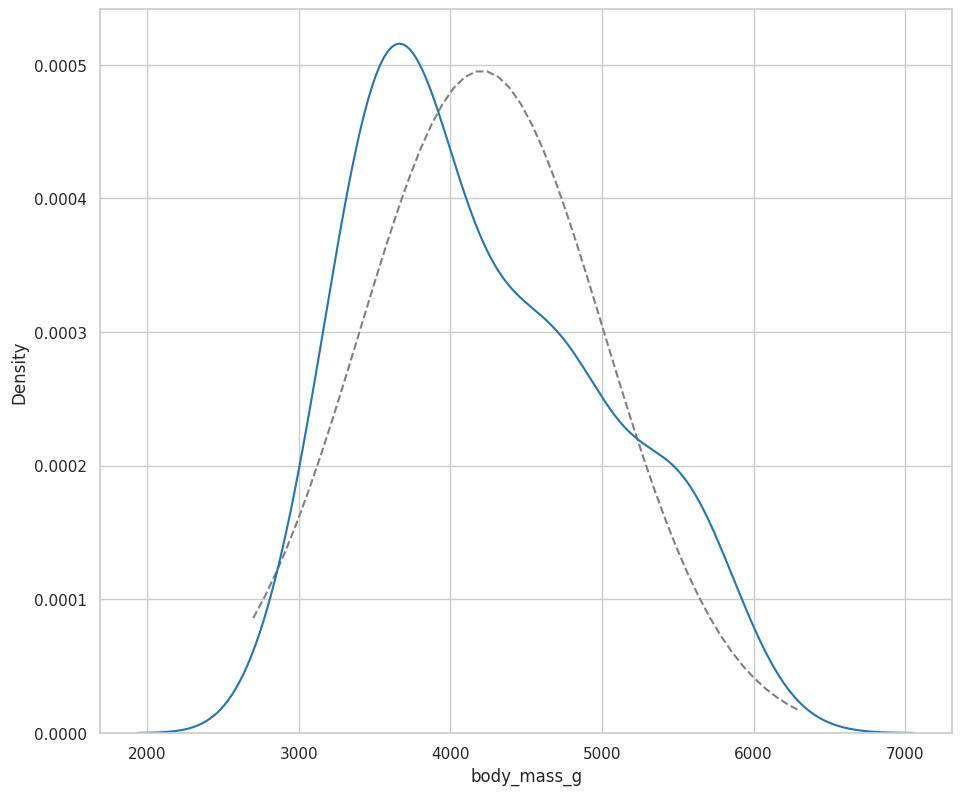

In [134]:
xs=np.linspace(stats['min'], stats['max'])
ys=scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
ys

plt.plot(xs,ys, color='gray', linestyle='dashed');

sns.kdeplot(
    data=penguins_df,
    x='body_mass_g',
)

Eliminamos el sesgo que impide que nuestros datos sigan una distribucion normal

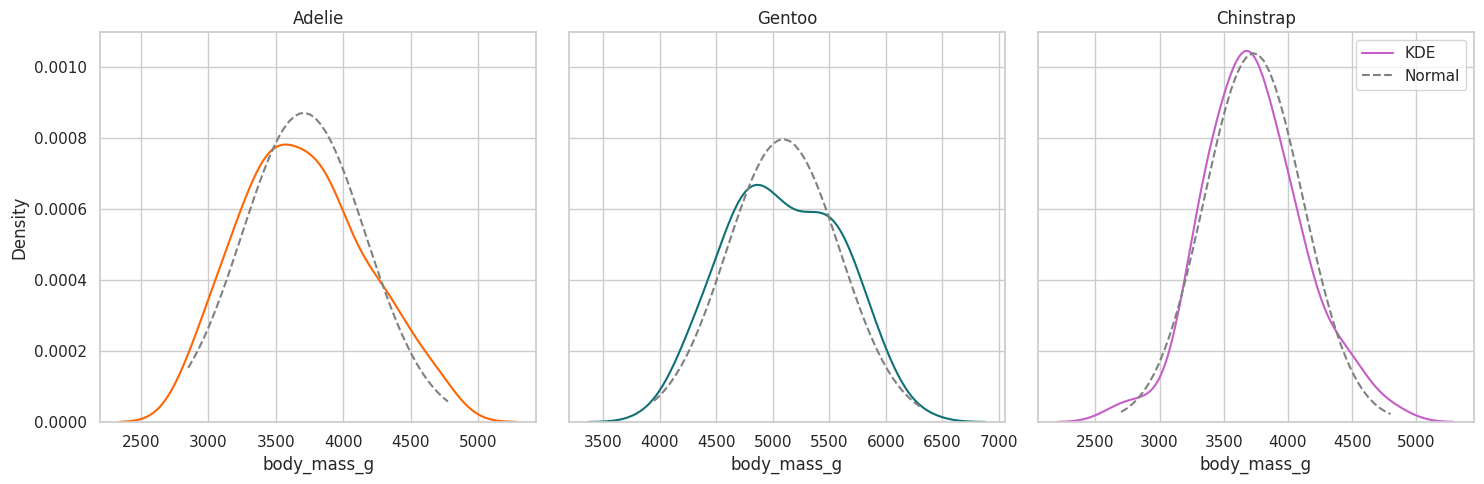

In [164]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, specie in enumerate(penguins_df['species'].unique()):
    specie_data=penguins_df[penguins_df['species'] == specie]
    stats= specie_data.body_mass_g.describe()
    xs=np.linspace(stats['min'], stats['max'])
    ys=scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)    

    sns.kdeplot(
        data=penguins_df.query('species == @specie'),
        x='body_mass_g',
        ax=axs[i],
        label='KDE',
        color=penguin_color[specie]
    )

    axs[i].plot(xs,ys, color='gray', linestyle='dashed', label='Normal');
    axs[i].set_title(specie)

plt.tight_layout()
plt.legend()
plt.show()

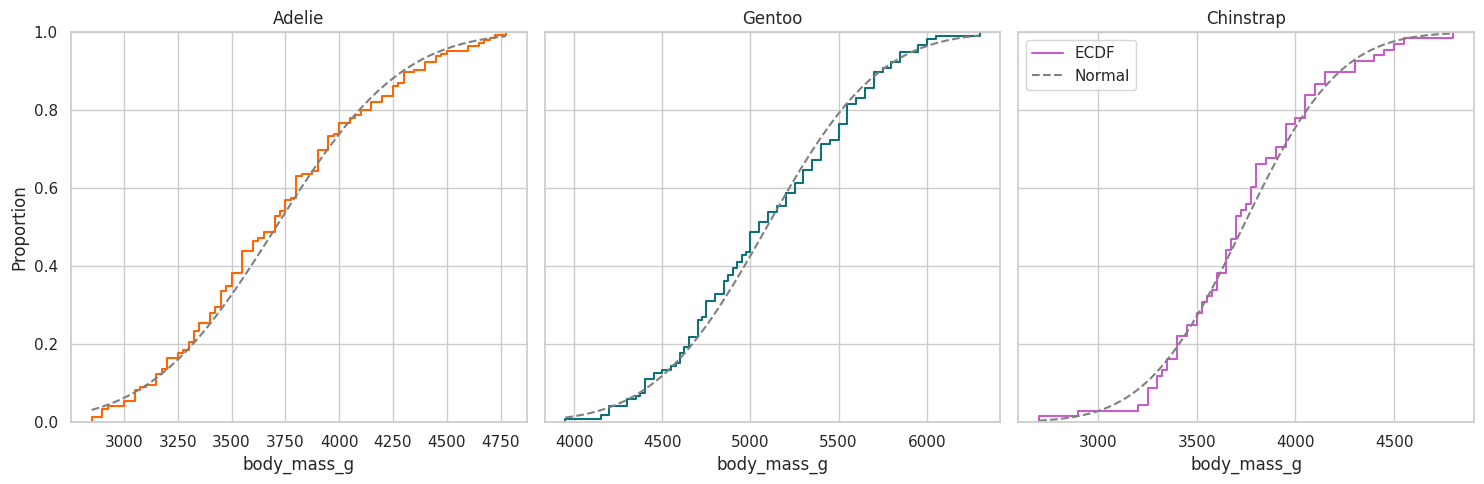

In [165]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, specie in enumerate(penguins_df['species'].unique()):
    specie_data=penguins_df[penguins_df['species'] == specie]
    stats= specie_data.body_mass_g.describe()
    xs=np.linspace(stats['min'], stats['max'])
    ys=scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)    

    sns.ecdfplot(
        data=penguins_df.query('species == @specie'),
        x='body_mass_g',
        ax=axs[i],
        label='ECDF',
        color=penguin_color[specie]
    )

    axs[i].plot(xs,ys, color='gray', linestyle='dashed', label='Normal');
    axs[i].set_title(specie)

plt.tight_layout()
plt.legend()
plt.show()

# Ley de los Grandes Numeros y Teorema del Límite Central

## Ley de los grandes números

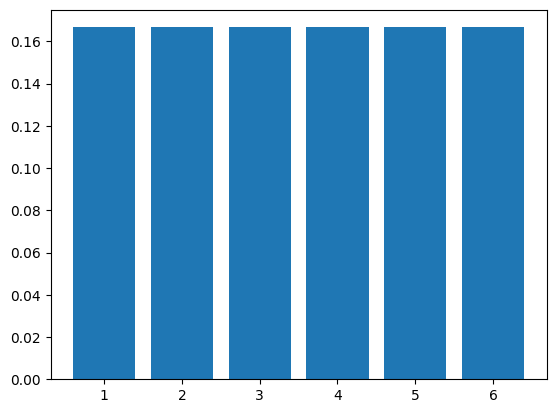

In [5]:
dice=empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

In [7]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values=dice.sample(sample_size)

    print(values)

[4. 3. 3. 6. 1. 1. 6. 3. 1. 5. 1. 1. 4. 1. 1. 4. 1. 6. 3. 4. 6. 3. 6. 5.
 4. 5. 5. 3. 6. 3. 4. 5. 2. 6. 1. 6. 1. 1. 6. 5. 2. 1. 1. 5. 6. 3. 1. 6.
 1. 5. 3. 5. 5. 2. 5. 1. 4. 6. 6. 1. 6. 3. 2. 2. 2. 2. 4. 6. 1. 4. 4. 2.
 5. 2. 6. 6. 1. 4. 1. 6. 3. 6. 2. 4. 6. 3. 1. 4. 2. 6. 6. 3. 1. 6. 4. 1.
 2. 4. 2. 1.]
[5. 1. 5. 1. 5. 6. 5. 1. 5. 6. 1. 4. 3. 6. 3. 5. 1. 2. 2. 6. 4. 3. 5. 5.
 3. 3. 6. 1. 6. 2. 4. 4. 3. 5. 4. 4. 4. 5. 3. 4. 6. 6. 5. 5. 3. 5. 3. 5.
 6. 4. 6. 3. 5. 1. 3. 1. 4. 4. 5. 2. 3. 5. 1. 3. 6. 1. 2. 5. 5. 6. 5. 1.
 1. 2. 4. 1. 2. 3. 6. 4. 6. 2. 2. 1. 5. 2. 3. 4. 1. 3. 2. 2. 4. 6. 6. 1.
 1. 6. 5. 5. 4. 1. 1. 2. 2. 1. 4. 3. 5. 2. 5. 1. 5. 1. 5. 1. 1. 5. 4. 5.
 2. 5. 1. 4. 5. 6. 6. 2. 6. 2. 6. 2. 2. 2. 6. 4. 4. 6. 1. 3. 3. 1. 6. 1.
 1. 4. 1. 3. 1. 5. 6. 1. 2. 1. 5. 6. 6. 5. 4. 6. 5. 4. 2. 6. 2. 4. 5. 5.
 4. 6. 2. 1. 6. 1. 5. 2. 6. 6. 4. 1. 3. 6. 4. 3. 1. 1. 2. 6. 3. 1. 2. 2.
 3. 5. 1. 1. 6. 4. 3. 4. 2. 3. 3. 5. 4. 1. 6. 1. 5. 3. 6. 4. 4. 5. 4. 4.
 3. 2. 6. 4. 6. 5. 3. 3. 4. 2. 6. 4. 

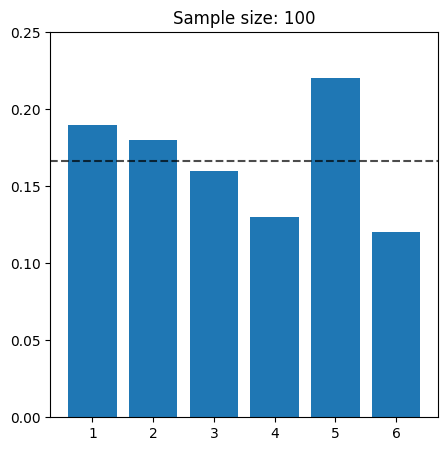

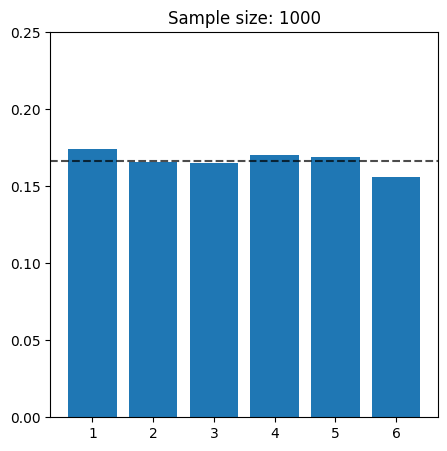

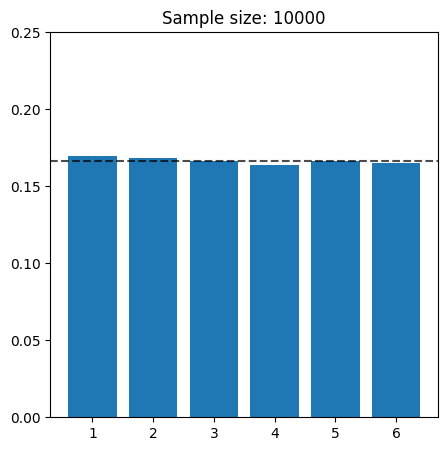

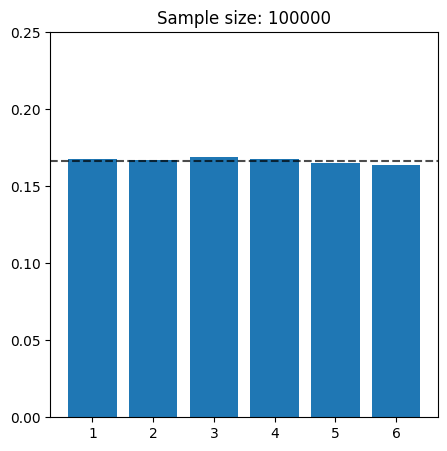

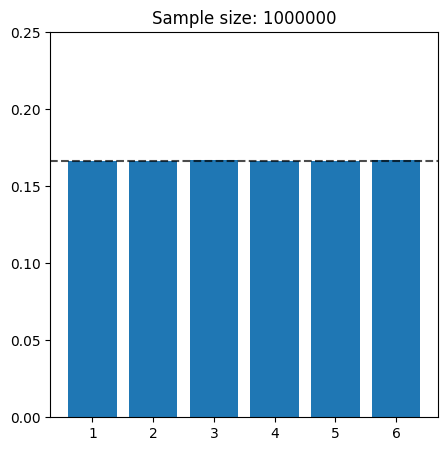

In [13]:
for sample_size in (1e2, 1e3, 1e4, 1e5, 1e6):
    sample_size = int(sample_size)
    values=dice.sample(sample_size)
    sample_pmf=empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(
        y=1/6,
        color='black',
        linestyle='--',
        alpha=0.7,
        label='theoretical'
    )
    plt.ylim([0, 0.25])
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central 

In [38]:
penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [39]:
sex_numeric=penguins_df.sex.replace(['male', 'female'], [1, 0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [44]:
number_samples=1000
sample_size=35

samples_df=pd.DataFrame()

np.random.seed(42)

for i in range(1, number_samples+1):
    sex_numeric_sample=sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name=f"sample_{i}"
    samples_df[sample_name]=sex_numeric_sample;

male_population_mean=samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {male_population_mean * 100:.4f}%")

/tmp/ipykernel_61906/3751773792.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name]=sex_numeric_sample;
/tmp/ipykernel_61906/3751773792.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name]=sex_numeric_sample;
/tmp/ipykernel_61906/3751773792.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

El porcentaje estimado de pingüinos machos en la población es: 50.1829%


/tmp/ipykernel_61906/3751773792.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name]=sex_numeric_sample;
/tmp/ipykernel_61906/3751773792.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name]=sex_numeric_sample;
/tmp/ipykernel_61906/3751773792.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

In [124]:
samples_df

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,...,sample_991,sample_992,sample_993,sample_994,sample_995,sample_996,sample_997,sample_998,sample_999,sample_1000
0,1,0,0,0,0,1,0,1,0,0,...,1,0,1,1,1,1,1,0,1,0
1,1,1,0,1,0,0,1,0,0,1,...,1,1,0,1,0,1,0,1,0,1
2,1,1,1,1,1,1,1,0,0,0,...,1,1,1,0,1,1,0,1,0,1
3,1,1,0,1,0,0,0,1,1,1,...,1,0,1,1,1,1,1,0,0,1
4,1,1,0,1,0,1,0,0,1,0,...,1,0,1,1,1,0,0,1,1,0
5,1,1,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
6,0,1,0,0,1,1,0,0,1,0,...,1,1,0,1,1,1,0,0,0,0
7,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
8,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,1,0,1,0,1,0,1,0,1,1,...,1,1,1,1,0,1,0,0,0,1


In [45]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# Definimos el DataFrame en blanco con su tamaño definido
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))
# Le asignamos nombres a las columnas.
col_names = []
for i in range(1, number_samples + 1):    
    col_names.append(f"sample_{i}")
samples_df.columns = col_names


for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()    
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {male_population_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: 50.7343%


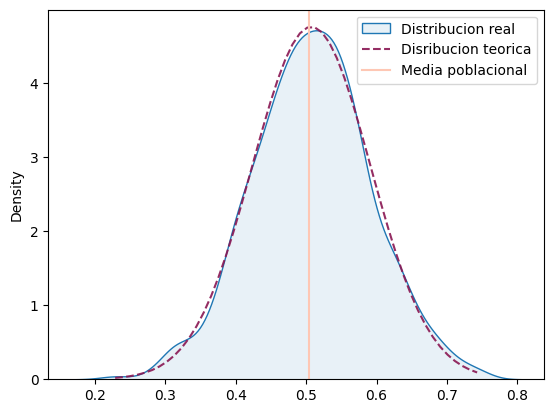

In [120]:
sample_means_binomial= pd.DataFrame(samples_df.mean(), columns=['sample_mean'])

#Distribucion de los datos
sns.kdeplot(
    data=sample_means_binomial, 
    label='Distribucion real', 
    fill=True,
    alpha=0.1,
    linewidth=1,
    )

# Distribucion teorica
plt.plot(
    xs,
    ys, 
    color='#891652', 
    linestyle='dashed', 
    label='Disribucion teorica', 
    alpha=0.9)

# Linea vertical en la media poblacional
xs=np.linspace(sample_means_binomial.min(), sample_means_binomial.max())
ys=scipy.stats.norm(sample_means_binomial.mean(), sample_means_binomial.std()).pdf(xs)
plt.axvline(
    x=sex_numeric.mean(), 
    color='#FEC7B4', 
    label='Media poblacional'
    )


plt.legend()
plt.show()

In [122]:
sample_size_experiment=pd.DataFrame(
    [[i,samples_df.iloc[:, :i].mean().mean().mean()] for i in range(1, number_samples+1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

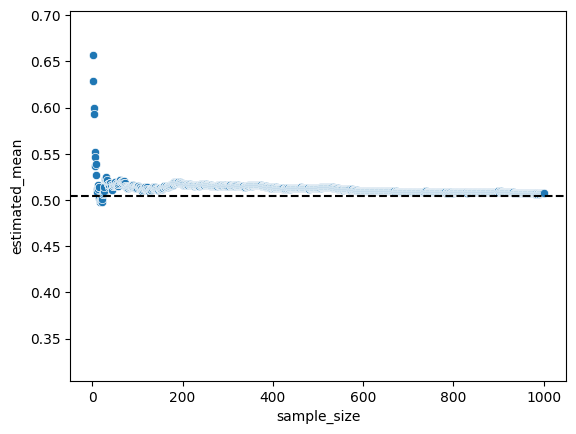

In [123]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='black',
    linestyle='--',
)

plt.ylim([sex_numeric.mean() - 0.2, sex_numeric.mean()+0.2])